# Handwritten Digit Recognition

This is a model for recognizing a handwritten digit from 0 to 9


## Importing Packages

Imports the below listed libraries

- Numpy 
- Matplotlib
- TensorFlow
- Scikit learn

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## Loads the handwritten data 

Loads the handwritten data from http://yann.lecun.com/exdb/mnist/

This is the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)

In [2]:
# Loads the training data
X = np.load('../Binary_Handwritten_Recognition/Data/X.npy')
print(f'The shape of the training dta is {X.shape}')

# Loads the target values
y = np.load('../Binary_Handwritten_Recognition/Data/y.npy')
print(f'The shape of the target values is {y.shape}')

The shape of the training dta is (5000, 400)
The shape of the target values is (5000, 1)


## Visualizing the data

This outputs few of the training examples and the target values

In [3]:
print(f'The first few training examples are \n {X[:5]}')

print(f'The first five target values are \n {y[:5]}')

The first few training examples are 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The first five target values are 
 [[0]
 [0]
 [0]
 [0]
 [0]]


## Data splitting 

This ssplits the data into train, cross validation(cv) and test set.

The train set will be used to train the model

The cross validation set will be used to validate the parameters gained from the train set to minimize variance(overfitting) or bias(underfitting). 

The test set will be used to test the model chosen after cross validation. 

40% train set, 20% cross validation(cv) set and 20% test set.

In [4]:
#help(train_test_split)
#This splits the data into train set and X_ and y_ which will inturn be subdided into cross validation and test set
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6, random_state=1)
print(f'The shape  of the training data is {X_train.shape}')
print(f'The shape of the target values is {y_train.shape} \n')

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)
print(f'The shape of the cross validation data is {X_cv.shape}')
print(f'The shape of the cross validation target values is {y_cv.shape} \n')

print(f'The shape of the test training data is {X_test.shape}')
print(f'The shape of the test set target value is {y_test.shape}')

del X_, y_

The shape  of the training data is (3000, 400)
The shape of the target values is (3000, 1) 

The shape of the cross validation data is (1000, 400)
The shape of the cross validation target values is (1000, 1) 

The shape of the test training data is (1000, 400)
The shape of the test set target value is (1000, 1)


## Data Description

The training data has a shape of 5000 by 400 where 400 represents the features in a 20 by 20 pixels of a handwritten digit.

Outputting the 20 by 20 pixels of any of the training data shows the exact handwritten digit

The corresponding y value shows the exact handwritten digit for that specific training example

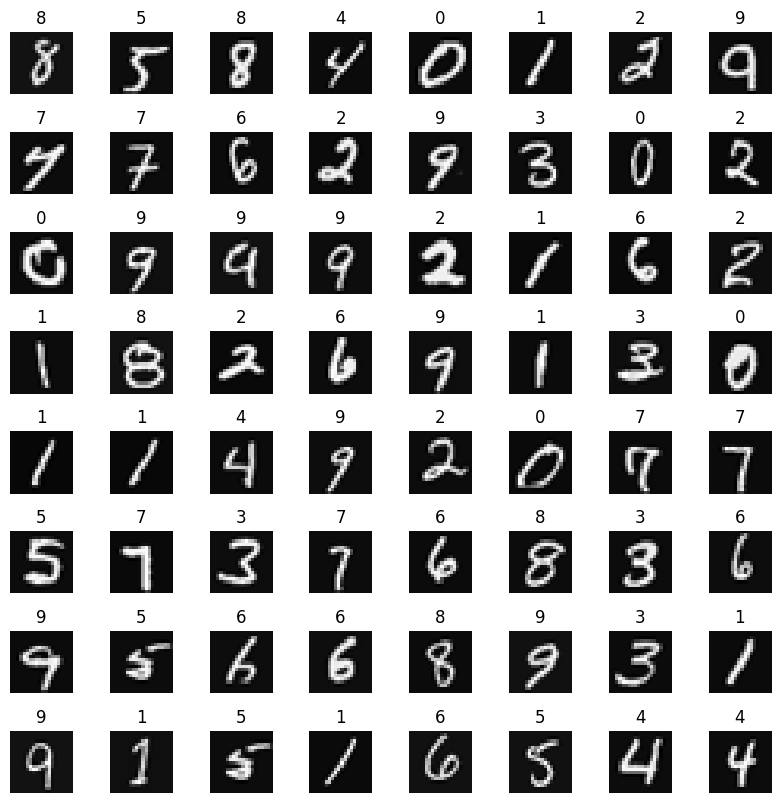

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    #Selects a random number within the training data range
    random_index = np.random.randint(m)

    #Selects row corresponding to the random index and 
    #Reshapes the image
    X_random_reshaped = X_train[random_index].reshape((20,20)).T

    #Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    #Dispalys the target value as a value above the image
    ax.set_title(y_train[random_index, 0])
    ax.set_axis_off()



## Defines the model

This defines different models with different layers but the same activation functions for the handwrittent recognition

These models will be trained on the training data set and based on the total cost(mean squared error) of the training data set and the cross validation set.

A suitable model will be chose based on the analysis or the model will be fine-tuned to get a well suitable parameters that fit the data well and generalizes very well (just right model) 

In [11]:
models = [
    Sequential(
        [
            Dense(units=25, activation='relu'),
            Dense(units=15, activation='relu'),
            Dense(units=10, activation='linear')
        ],  name = 'Model_1'
), 

Sequential(
    [
        Dense(units=5, activation='relu'),
        Dense(units=10, activation='linear')
    ], name = 'Model_2'
), 

Sequential(
    [
        Dense(units=30, activation='relu'),
        Dense(units=35, activation='relu'),
        Dense(units=20, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=40, activation='relu'),
        Dense(units=10, activation='linear')
    ], name = 'Model_3'
)
]

regularized_model = [
    Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_1'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0002)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0002)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0002)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0002)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0002)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_2'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0003)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0003)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0003)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0003)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0003)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_3'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_4'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_5'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0006)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0006)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0006)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0006)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0006)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_6'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0007)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0007)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0007)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0007)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0007)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_7'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0008)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0008)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0008)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0008)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0008)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_8'
),

Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0009)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0009)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0009)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0009)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0009)),
        Dense(units=10, activation='linear')
    ], name = 'Reg_9'
)
]

preferred_model = [
    Sequential(
    [
        Dense(units=30, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=35, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=20, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0004)),
        Dense(units=10, activation='linear')
    ], name = 'my_model'
)
]

## Trains the neural network

This trains the neural network using the training data and the data specified below

- Trains the neural network using the X_train dataset

- Trains the training the data using the models specified in the above code

- Validates the each of the models using the cross validation dataset to select the best model for fine-tune the models

- Specifies and imports the SparseCategoricalCrossentropy cost function to be used to train the neural network. Since the output layer is a    softmax (multilabel layer), the from_logits parameter in the function will be set to true.

- The from_logits set to True shows that the last layer in the neural network is multilable classification hence tensorFlow uses a more error tolerating softmax function as the activation function for that layer, reducing run-off errors

- Specifies the Adaptive Gradient Descent (Adam) optimizer to used during training to enable gradiesnt descent get to the local minimum faster which inturn speeds up the training process

- Specifies the epochs (number of iterations) during training for each of the models

In [10]:
#Imports the SparseCategoricalCrossentropy loss from tensorFlow
from tensorflow.keras.losses import SparseCategoricalCrossentropy

#Imports the Adaptive Gradient Descent(Adam) optimizer from tensorFlow
from tensorflow.keras.optimizers import Adam

#Iterates through each of the models, train the neural networks and outpust the mean squared error for both
#The training data nd the cross validation data

train_mses = []
cv_mses = []

for model in preferred_model:
    model.compile(
        loss = SparseCategoricalCrossentropy(from_logits=True),
        optimizer = Adam(0.001)
    )

    print(f'Training {model.name} ...')

    model.fit(
        X_train, y_train, 
        epochs=100,
        verbose=0
        )

    print('Done! \n')

    #Record the training MSEs
    yhat = model.predict(X_train)   
    yhat = np.argmax(yhat, axis=1)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    #Record the cross validation MSEs
    yhat = model.predict(X_cv)
    yhat = np.argmax(yhat, axis=1)
    cv_mse = mean_squared_error(y_cv, yhat) /2
    cv_mses.append(cv_mse)

print('RESULTS')
for model_num in range(len(train_mses)):
    print(
        f'Model {model_num+1}: Training MSE: {train_mses[model_num]:.2f}, ' +
        f'Model {model_num+1}: CV MSE: {cv_mses[model_num]:.2f}'
    )

Training my_model ...
Done! 

32/32 [==============================] - 0s 6ms/step
RESULTS
Model 1: Training MSE: 0.00, Model 1: CV MSE: 0.63


## Training and cross validation MSE analysis

- The training MSE for the training set is 0.0 but the MSE for tge cross validation is 0.72 which is an indication of overfitting (High variance). Since the cross validation is the second lowest, it is not preferred

- The training MSE for the training set is 0.42 which indicates underfitting (High bias), the model does not fit the training data well and hence performs poorly on the cross validation set. 

- The training MSE for the training set is 0 with the smallest MSE cross validation which indicates overfitting (High variance). Since this model has the smallest cross validation, it is the preferred one. 

- Model_3 will be regularized to fix overfitting

- Select 0.0008 with CV MSE 0.48

- The 0.006 regularizer has the least CV 0.58

- The 0.03 regularizer has the least CV 0.58

- The 0.01 regularizer has the least CV 0.70

- 0.0008 is chosen as the regularizer for the model, since it has the least CV MSE

## Prediction

The preferred model is used to analyse and predict the test set. This is set as the world serror when the model is deployed to the end-user 

In [33]:
yhat_test = model.predict(X_test)
yhat_test = np.argmax(yhat_test, axis=1).reshape(-1,1)
test_mse = mean_squared_error(y_test, yhat_test) / 2
print(f'The test MSE is {test_mse:.2f}')

32/32 [==============================] - 0s 8ms/step
The test MSE is 0.75


## Model Accuracy

Outputs the accuracy of the model using the test set and the accuracy score method in scikit learn

In [94]:
#TODO
#print(type(np.asmatrix(y_test)))
#print(y_test.shape)
#print(yhat_test)

#accuracy_score(y_test, yhat_test)

## Model Summary

This gives a summary of the preferred model

In [40]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_207 (Dense)           (None, 30)                12030     
                                                                 
 dense_208 (Dense)           (None, 35)                1085      
                                                                 
 dense_209 (Dense)           (None, 20)                720       
                                                                 
 dense_210 (Dense)           (None, 16)                336       
                                                                 
 dense_211 (Dense)           (None, 40)                680       
                                                                 
 dense_212 (Dense)           (None, 10)                410       
                                                                 
Total params: 15261 (59.61 KB)
Trainable params: 15261 (59

## Examine Parameter Shapes

This outputs the shapes of the parameters that is the weight and bias at each layer of the neural network 

In [55]:
#Extracts the layers in the model
[layer1, layer2, layer3, layer4, layer5, layer6] = model.layers

#Gets the weight and bias at each layer
for index, layer in enumerate(model.layers):
    w_index, b_index = layer.get_weights()
    print(f'W{index+1} shape: {w_index.shape}, b{index+1} shape: {b_index.shape}')

W1 shape: (400, 30), b1 shape: (30,)
W2 shape: (30, 35), b2 shape: (35,)
W3 shape: (35, 20), b3 shape: (20,)
W4 shape: (20, 16), b4 shape: (16,)
W5 shape: (16, 40), b5 shape: (40,)
W6 shape: (40, 10), b6 shape: (10,)


## Visualize the Parameters at a specified layer

This outputs the parameters in a specified layer

The layer can be modified to access the exact parameters of interest

In [56]:
print(model.layers[4].weights)

[<tf.Variable 'dense_211/kernel:0' shape=(16, 40) dtype=float32, numpy=
array([[-2.06933401e-33,  1.01052602e-33, -1.44623513e-33,
         6.07683743e-33, -2.98895006e-33, -7.26059073e-33,
         1.69720740e-33, -3.48996632e-33, -3.69556616e-33,
         3.87437061e-34, -4.14391477e-33,  5.26479969e-33,
         1.00200167e-33, -6.48670660e-34, -2.82812301e-34,
         1.22429583e-33, -3.29468732e-33, -2.96049722e-33,
        -5.63514580e-33, -5.03503132e-33,  2.04565515e-33,
         5.70041953e-33, -3.05069051e-33, -3.44871088e-33,
        -5.80225775e-33, -1.73864284e-33,  7.31302660e-33,
         1.11968913e-33, -4.26291153e-33, -3.54171746e-33,
        -5.58178680e-33,  3.13671300e-33, -2.11368211e-34,
         3.91735586e-33,  7.18270762e-33,  1.02825413e-33,
        -7.18573378e-33, -2.20444037e-33,  6.30805901e-33,
        -2.41658404e-33],
       [ 5.49346954e-02,  1.80813298e-01, -1.11664064e-01,
         1.14568755e-01,  1.31595582e-01, -3.29733714e-02,
        -2.061055

## Visualize the predicted values in the test set and the target test set

This prints the images of some random handwritten digits in the test training data and match them against their target value and the predicted value in the test training data

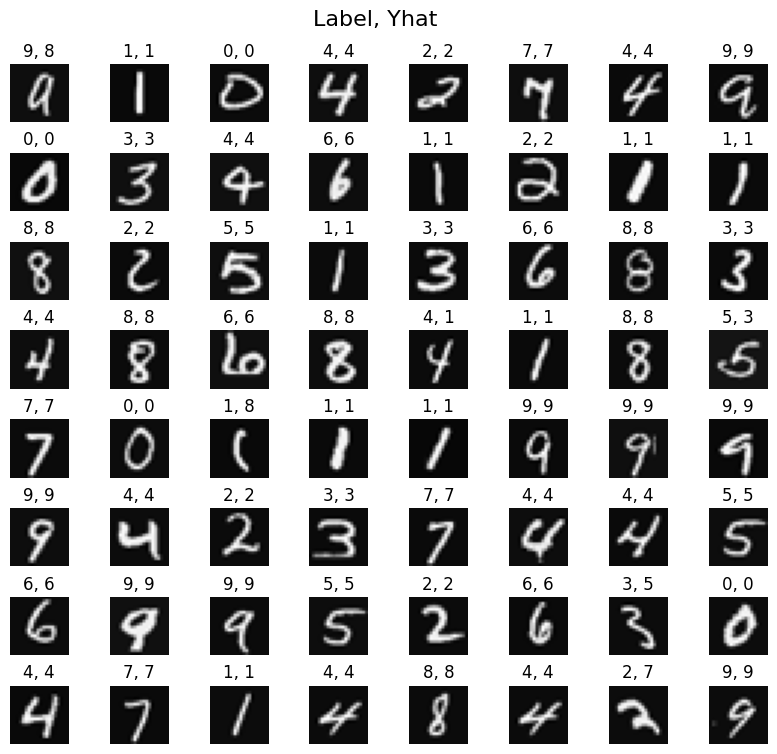

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    # Selects the row corresponding to the random index and
    # Reshape the image
    X_random_reshaped = X_test[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f'{y_test[random_index, 0]}, {yhat_test[random_index, 0]}')
    ax.set_axis_off()

fig.suptitle('Label, Yhat', fontsize=16)
plt.show()

## Visualizes the misclasified digits

This shows the digits that were misclassified, their target values and the predicted value

The test training set is used


A total of 84 test data were misclassified


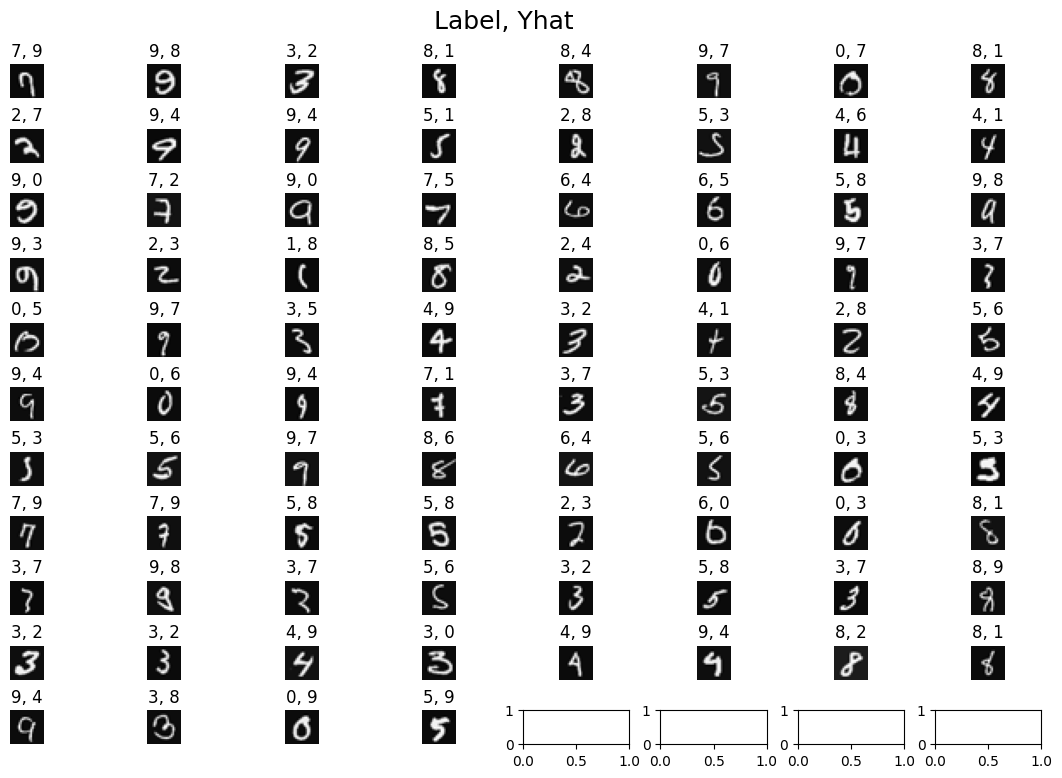

In [95]:
import warnings 
warnings.filterwarnings(action='ignore', category=FutureWarning)

errors = np.where(y_test != yhat_test)
errors_indices = errors[0]
#print(errors_indices)
print(f'A total of {len(errors[0])} test data were misclassified')

fig, axes = plt.subplots(11, 8, figsize=(11,8))

fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    try:
        error_index = errors_indices[i]
    except IndexError:
        break

    # Selects the row corresponding to the random index and
    # Reshape the image
    X_error_reshaped = X_test[error_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_error_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f'{y_test[error_index, 0]}, {yhat_test[error_index, 0]}')
    ax.set_axis_off()

fig.suptitle('Label, Yhat', fontsize=18)
plt.show()